In [1]:
import tensorflow


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
cnn = Sequential()

In [4]:
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

c:\Users\khair\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))   # IMPORTANT


In [6]:
cnn.compile(optimizer='adam', 
            loss='binary_crossentropy',   # IMPORTANT
            metrics=['accuracy'])


In [7]:
# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\all projects\data analysis project\deep_learning\projects\cat vs dog\train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\all projects\data analysis project\deep_learning\projects\cat vs dog\test",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
# Train model
cnn.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 341s 545ms/step - accuracy: 0.6750 - loss: 0.5918 - val_accuracy: 0.7558 - val_loss: 0.5037
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 266s 425ms/step - accuracy: 0.7649 - loss: 0.4902 - val_accuracy: 0.7850 - val_loss: 0.4589
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.7970 - loss: 0.4352 - val_accuracy: 0.7958 - val_loss: 0.4516
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.8220 - loss: 0.3861 - val_accuracy: 0.8084 - val_loss: 0.4183
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.8519 - loss: 0.3359 - val_accuracy: 0.7932 - val_loss: 0.4449
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.8751 - loss: 0.2910 - val_accuracy: 0.7964 - val_loss: 0.4697
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.8970 - loss: 0.2442 - val_accuracy: 0.8014 - val_loss: 0.4901
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 108ms/step - accuracy: 0.9158 - loss:

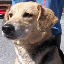

In [29]:
import numpy as np
from tensorflow.keras.preprocessing import image

# 1️⃣ Load image
img = image.load_img(r"C:\all projects\data analysis project\deep_learning\projects\cat vs dog\singleprecation\dog.125.jpg",target_size = (64,64))
img



In [30]:
# 2️⃣ Convert → array
img_array = image.img_to_array(img)

# 3️⃣ Expand dims (because model expects batch)
img_array = np.expand_dims(img_array, axis=0)
 
# 5️⃣ Predict
result = cnn.predict(img_array)
 
# 6️⃣ Print result
if result[0][0] > 0.5:
    print("Prediction: 🐶 DOG")
else:
    print("Prediction: 🐱 CAT")

print("Probability:", float(result[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: 🐶 DOG
Probability: 1.0


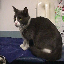

In [31]:
# 1️⃣ Load image
img = image.load_img(r"C:\all projects\data analysis project\deep_learning\projects\cat vs dog\singleprecation\cat.4.jpg",target_size = (64,64))
img

In [32]:
# 2️⃣ Convert → array
img_array = image.img_to_array(img)

# 3️⃣ Expand dims (because model expects batch)
img_array = np.expand_dims(img_array, axis=0)

 # 5️⃣ Predict
result = cnn.predict(img_array)
 
# 6️⃣ Print result
if result[0][0] > 0.5:
    print("Prediction: 🐶 DOG")
else:
    print("Prediction: 🐱 CAT")

print("Probability:", float(result[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: 🐱 CAT
Probability: 0.0


In [34]:
cnn.save("cat_dog_cnn_model.keras")
